### Основная модель рекомендаций 
#### Пример использования

In [1]:
import model as mod

Модель получает на вход имена трех файлов: <br>
1)файл с рассчитанными соседями объектов/услуг (в примере это книги)<br>
2)файл с рассчитанными соседями пользователей (в примере: читатели)<br>
3)Историю использования услуг пользователями

In [2]:
predictor = mod.predict_model('books_neighbors.csv', 'clients_neighbors.csv', 'usersid_booksid.csv')

Загрузка файла метрик книг
Загрузка файла метрик пользователей
Загрузка истории пользователей


Метод $predict$ получает на вход $list$ с $id$ пользователей, для которых нужно составить рекомендации и максимальное кол-во рекомендаций <br>
Возвращаемое значение: $list$ с рекомендациями для пользователей<br>
Рекомендация в формате $pandas.Series$, где индексы - это индексы услуги/объекта, значения - рейтинг рекомендации

In [3]:
pred = predictor.predict(['79379'], 10)[0]
pred

414061    1.000000
424075    1.000000
473886    0.923077
500431    0.846154
480930    0.846154
410899    0.538462
442889    0.461538
468335    0.461538
406853    0.461538
442890    0.461538
dtype: float64

Пример 10 рекомендаций для пользователя 79379<br>
Отобразим рейтинги и рекомендации в наглядном виде

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
cat = pd.read_excel('каталог.xlsx')

In [6]:
cat['doc_id'] = cat['doc_id'].astype('str')
cat = cat.set_index('doc_id')
conn = pd.read_csv('usersid_booksid.csv', sep =';')
conn['userid'] = conn['userid'].astype('int').astype('str')
conn = conn.set_index('userid')

In [7]:
for bid in conn.loc['79379']['bookid'].split(','):
    info = cat.loc[bid]
    print('Автор: '+info['p100a']+' , Название: '+info['p245a']+',  Жанр: '+info['p650a'])

Автор: Устинова Татьяна Витальевна , Название: Пять шагов по облакам,  Жанр: Художественная литература
Автор: Устинова Татьяна Витальевна , Название: Седьмое небо,  Жанр: Художественная литература


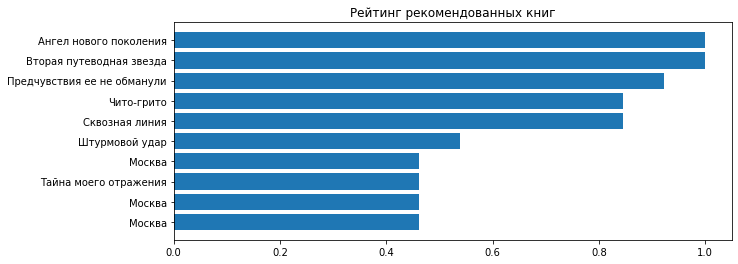

In [14]:
names = [cat.loc[bid]['p245a'] for bid in pred.index][::-1]
importances = pred.values
indices = np.argsort(importances)

plt.figure(figsize = (10, 4))
plt.title("Рейтинг рекомендованных книг")
plt.barh(range(10), importances[indices])
plt.yticks(range(10), names)
plt.show()